# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
from citipy import citipy
from api_keys import weather_api_key
from pprint import pprint
from datetime import datetime


In [13]:
lat_range = (-90, 90)
long_range = (-180, 180)

lat_long = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
long = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lats, long)

for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
City = []
Country = []
Lat = []
Long = []              
Max_temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Date = []

city_number = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "units=Metric"

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
for city in cities:           
    query = f"{url}q={city}&{units}&appid={weather_api_key}"
    response = requests.get(query).json()
   
    try:     
        city = response["name"]
        City.append(city)
        
        country = response["sys"]["country"]
        Country.append(country)
    
        lati = response["coord"]["lat"]
        Lat.append(lati)
    
        longi = response["coord"]["lon"]
        Long.append(longi)
    
        temp = response['main']['temp_max']
        Max_temp.append(temp)
    
        hum = response['main']['humidity']
        Humidity.append(hum)
        
        cloud = response["clouds"]["all"]
        Cloudiness.append(cloud)
    
        wind = response["wind"]["speed"]
        Wind_Speed.append(wind)
        
        date = response["dt"]
        dt_object = datetime.fromtimestamp(date)
        d = dt_object.strftime("%m/%d/%Y")
        Date.append(d)
        
        print(city_number, response["name"])
        
        city_number = city_number + 1
    
    except KeyError:
        pass


0 Nikolskoye
1 Mezhdurechensk
2 Kulhudhuffushi
3 Lobatse
4 Ushuaia
5 Mataura
6 Dikson
7 Bethel
8 Ahipara
9 Kendari
10 Antofagasta
11 Kaduna
12 Esperance
13 Tomatlán
14 Anadyr
15 Hithadhoo
16 Beni
17 La Ronge
18 Rikitea
19 Chanute
20 Bluff
21 Campbellton
22 Lavrentiya
23 Albany
24 Nioro
25 Mnogovershinnyy
26 Port Elizabeth
27 Jacareacanga
28 Hasaki
29 Chimoré
30 Airai
31 George Town
32 Ukiah
33 Atuona
34 Kandrian
35 Barrow
36 Tuktoyaktuk
37 Punta Arenas
38 Bengkulu
39 Olafsvik
40 Lifford
41 Asău
42 Saldanha
43 Busselton
44 Ostrovnoy
45 Vestmannaeyjar
46 Yatou
47 Paita
48 Honningsvåg
49 Butaritari
50 East London
51 Mackay


KeyboardInterrupt: 

## Generate Cities List

In [16]:
main_df = pd.DataFrame({"City": City,
              "Country": Country,          
              "Lat": Lat,
              "Long": Long,
              "Max Temp": Max_temp,
              "Humidity": Humidity,
              "Cloudiness": Cloudiness,
              "Wind Speed": Wind_Speed,
              "Date": Date})
main_df.to_csv("output_data/main_df.csv")
main_df.head()

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Nikolskoye,RU,59.70,30.79,8.33,93,53,1.00,09/30/2020
1,Mezhdurechensk,RU,53.69,88.06,1.46,92,100,2.87,09/30/2020
2,Kulhudhuffushi,MV,6.62,73.07,27.58,73,87,4.51,09/30/2020
3,Lobatse,BW,-25.22,25.67,16.00,82,92,10.30,09/30/2020
4,Ushuaia,AR,-54.80,-68.30,-1.00,80,90,12.30,09/30/2020


In [17]:
# Creates variables for relevant table columns
latitude = main_df["Lat"]
temperature = main_df["Max Temp"]
humidity = main_df["Humidity"]
cloudiness = main_df["Cloudiness"]
wind_speed = main_df["Wind Speed"]

the_date = main_df['Date'].iloc[0]


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

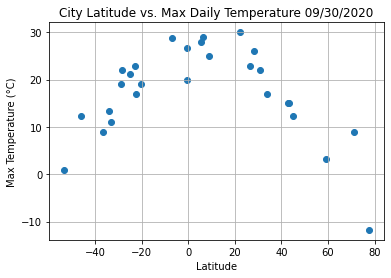

In [9]:
plt.scatter(latitude, temperature)
plt.title("City Latitude vs. Max Daily Temperature " + the_date)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.savefig("output_data/lat_vs_temp.png")

## Latitude vs. Humidity Plot

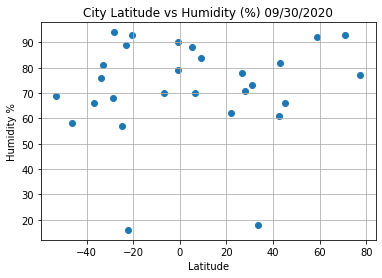

In [10]:
plt.scatter(latitude, humidity)
plt.title("City Latitude vs Humidity (%) " + the_date)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
plt.savefig("output_data/lat_vs_hum.png")

## Latitude vs. Cloudiness Plot

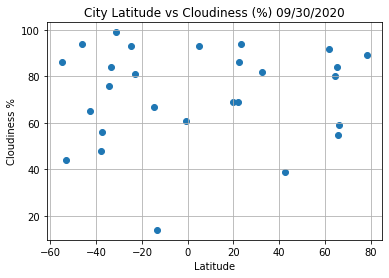

In [11]:
plt.scatter(latitude, humidity)
plt.title("City Latitude vs Cloudiness (%) " + the_date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.savefig("output_data/lat_vs_cloud.png")

## Latitude vs. Wind Speed Plot

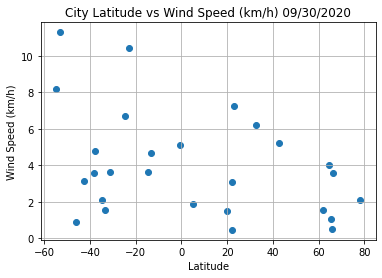

In [12]:
plt.scatter(latitude, wind_speed)
plt.title("City Latitude vs Wind Speed (km/h) " + the_date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.grid(True)
plt.savefig("output_data/lat_vs_wind.png")

## Linear Regression

In [1]:
north_df = main_df.loc[main_df["Lat"] >= 0]
south_df = main_df.loc[main_df["Lat"] < 0]

north_lat = north_df["Lat"]
south_lat = south_df["Lat"]

NameError: name 'main_df' is not defined

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

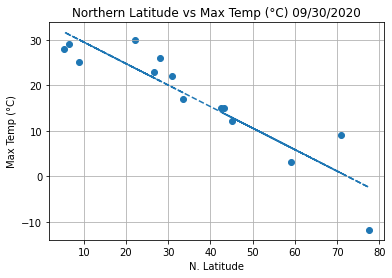

In [12]:
plt.scatter(north_lat, north_df["Max Temp"])
plt.title("Northern Latitude vs Max Temp (°C) " + the_date)
plt.xlabel("N. Latitude")
plt.ylabel("Max Temp (°C)")
plt.grid(True)

(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(north_lat, north_df["Max Temp"])
linear_reg = vc_slope * north_lat + vc_int
plt.plot(north_lat,linear_reg,"--")
plt.savefig("output_data/north_temp_linregress.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

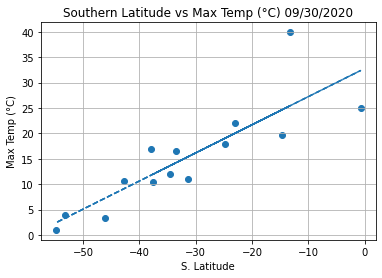

In [34]:
plt.scatter(south_lat, south_df["Max Temp"])
plt.title("Southern Latitude vs Max Temp (°C) " + the_date)
plt.xlabel("S. Latitude")
plt.ylabel("Max Temp (°C)")
plt.grid(True)

(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(south_lat, south_df["Max Temp"])
linear_reg = vc_slope * south_lat + vc_int
plt.plot(south_lat,linear_reg,"--")
plt.savefig("output_data/south_temp_linregress.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

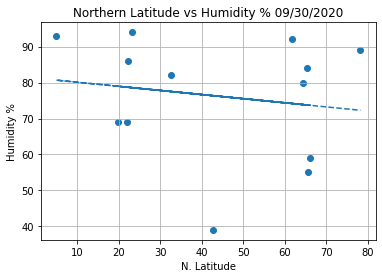

In [35]:
plt.scatter(north_lat, north_df["Humidity"])
plt.title("Northern Latitude vs Humidity % " + the_date)
plt.xlabel("N. Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(north_lat, north_df["Humidity"])
linear_reg = vc_slope * north_lat + vc_int
plt.plot(north_lat,linear_reg,"--")
plt.savefig("output_data/north_humid_linregress.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

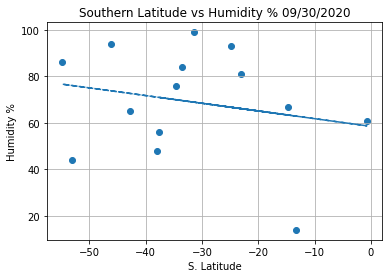

In [36]:
plt.scatter(south_lat, south_df["Humidity"])
plt.title("Southern Latitude vs Humidity % " + the_date)
plt.xlabel("S. Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(south_lat, south_df["Humidity"])
linear_reg = vc_slope * south_lat + vc_int
plt.plot(south_lat,linear_reg,"--")
plt.savefig("output_data/south_humid_linregress.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

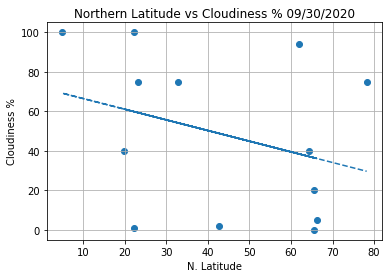

In [37]:
plt.scatter(north_lat, north_df["Cloudiness"])
plt.title("Northern Latitude vs Cloudiness % " + the_date)
plt.xlabel("N. Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)

(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(north_lat, north_df["Cloudiness"])
linear_reg = vc_slope * north_lat + vc_int
plt.plot(north_lat,linear_reg,"--")
plt.savefig("output_data/north_cloud_linregress.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [7]:
plt.scatter(south_lat, south_df["Cloudiness"])
plt.title("Southern Latitude vs Cloudiness % " + the_date)
plt.xlabel("S. Latitude")
plt.ylabel("Cloudiness % ")
plt.grid(True)

(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(south_lat, south_df["Cloudiness"])
linear_reg = vc_slope * south_lat + vc_int
plt.plot(south_lat,linear_reg,"--")
plt.savefig("output_data/south_cloud_linregress.png")
plt.show()

NameError: name 'south_lat' is not defined

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

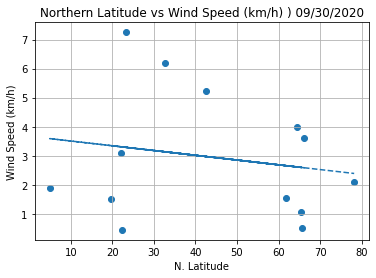

In [39]:
plt.scatter(north_lat, north_df["Wind Speed"])
plt.title("Northern Latitude vs Wind Speed (km/h) ) " + the_date)
plt.xlabel("N. Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.grid(True)

(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(north_lat, north_df["Wind Speed"])
linear_reg = vc_slope * north_lat + vc_int
plt.plot(north_lat,linear_reg,"--")
plt.savefig("output_data/north_wind_linregress.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

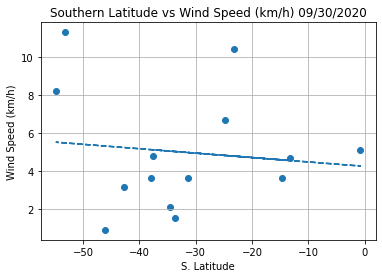

In [40]:
plt.scatter(south_lat, south_df["Wind Speed"])
plt.title("Southern Latitude vs Wind Speed (km/h) " + the_date)
plt.xlabel("S. Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.grid(True)

(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(south_lat, south_df["Wind Speed"])
linear_reg = vc_slope * south_lat + vc_int
plt.plot(south_lat,linear_reg,"--")
plt.savefig("output_data/south_wind_linregress.png")
plt.show()